# Descarga de los datasets

In [1]:
# Descarga el dataset de imagenes no etiquetadas
!gdown "https://drive.google.com/uc?export=download&id=12ELJm48gudZApmxozqqeg4JL5HInDauU"

Downloading...
From: https://drive.google.com/uc?export=download&id=12ELJm48gudZApmxozqqeg4JL5HInDauU
To: /content/images_tr.rar
342MB [00:01, 178MB/s]


In [2]:
# instala el compresor
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 1s (319 kB/s)
Selecting previously unselected package rar.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [3]:
# extrae los archivos
! rar x 'images_tr.rar'


RAR 5.50   Copyright (c) 1993-2017 Alexander Roshal   11 Aug 2017
Trial version             Type 'rar -?' for help


Extracting from images_tr.rar

Creating    images_tr                                                 OK
Creating    images_tr/56                                              OK
Extracting  images_tr/56/spleen_56.ni_z026.png                             0%  OK 
Extracting  images_tr/56/spleen_56.ni_z014.png                             0%  OK 
Extracting  images_tr/56/spleen_56.ni_z008.png                             0%  OK 
Extracting  images_tr/56/spleen_56.ni_z031.png                             0%  OK 
Extracting  images_tr/56/spleen_56.ni_z030.png                             0%  OK 
Extracting  images_tr/56/spleen_56.ni_z032.png                             0%  OK 
Extracting  images_tr/56/spleen_56.ni_z001.png                             0%  OK 
Extracting  images_tr/56/spleen_56.ni_z019.png               

# Carga el modelo

In [4]:
# Descarga el modelo entrenado en el proyecto =D
!gdown "https://drive.google.com/uc?export=download&id=1vlLGX3Lx8q-rH-rxNqVvxRKNWaSxn9i9"

Downloading...
From: https://drive.google.com/uc?export=download&id=1vlLGX3Lx8q-rH-rxNqVvxRKNWaSxn9i9
To: /content/modelito
334MB [00:04, 77.2MB/s]


In [9]:
# load the model
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
# importa las librerias que se usan para carga
import numpy as np
import torchvision
from matplotlib import pyplot as plt
from matplotlib.image import imread
from matplotlib import colors as clt
from torchsummary import summary
from torchvision import transforms
from torch.autograd import Variable
from PIL import Image

In [10]:
final_model = torch.load('modelito')
final_model.eval()

DataParallel(
  (module): Sequential(
    (0): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1))
    (1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_s

# Visualiza los resultados

In [11]:
image_input = Image.open('images_tr/12/spleen_12.ni_z018.png')

# Define transformations for the image, should (note that imagenet models are trained with image size 224)
transformation = transforms.Compose([
    transforms.CenterCrop(512),
    transforms.ToTensor(),
])

# Preprocess the image
image_input_tensor = transformation(image_input).float()

# Add an extra batch dimension since pytorch treats all images as batches
image_input_tensor = image_input_tensor.unsqueeze_(0)

if torch.cuda.is_available():
    image_input_tensor.cuda()

# Turn the input into a Variable
input = Variable(image_input_tensor)

In [14]:
# Obtiene resultado
response = final_model(input)

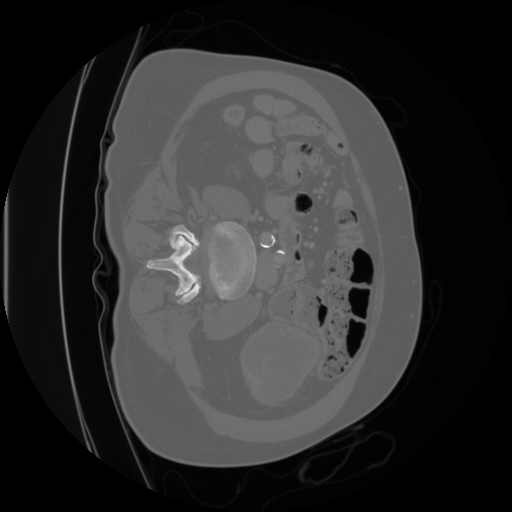

In [15]:
# Muestra la entrada
im = transforms.ToPILImage()(input.squeeze_(0).cpu())
display(im)

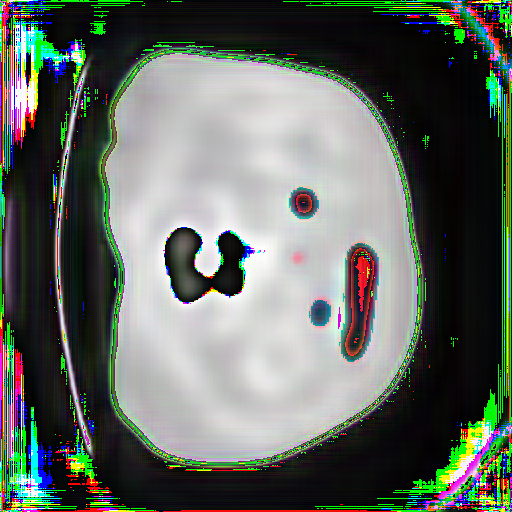

In [16]:
# Muestra el resultado
from torchvision import transforms
im = transforms.ToPILImage()(response.squeeze_(0).cpu())
display(im)